In [31]:
import requests
import urllib.request as ulib
import datetime as datetime  
import pandas as pd  
import statsmodels.api as sm  
import seaborn as sns  
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
# Import the sample streamflow dataset
data = ulib.urlopen('https://raw.github.com/mps9506/Sample-Datasets/master/Streamflow/USGS-Monthly_Streamflow_Bend_OR.tsv')  
df = pd.read_csv(data, sep='\t')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 7 columns):
agency_cd       799 non-null object
site_no         799 non-null int64
parameter_cd    799 non-null int64
dd_nu           799 non-null int64
year_nu         799 non-null int64
month_nu        799 non-null int64
mean_va         799 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 43.8+ KB
None


,agency_cd,site_no,parameter_cd,dd_nu,year_nu,month_nu,mean_va
0,USGS,14064500,60,5,1924,3,1367.0
1,USGS,14064500,60,5,1924,4,1407.0
2,USGS,14064500,60,5,1924,5,1274.0
3,USGS,14064500,60,5,1924,6,1367.0
4,USGS,14064500,60,5,1924,7,1239.0


In [16]:
# The yyyy,mm, and dd are in seperate columns, we need to make this a single column
df['dti'] = df[['year_nu','month_nu','dd_nu']].apply(lambda x: datetime.datetime(*x),axis=1)

In [17]:
df.head(10)

,agency_cd,site_no,parameter_cd,dd_nu,year_nu,month_nu,mean_va,dti
0,USGS,14064500,60,5,1924,3,1367.0,1924-03-05
1,USGS,14064500,60,5,1924,4,1407.0,1924-04-05
2,USGS,14064500,60,5,1924,5,1274.0,1924-05-05
3,USGS,14064500,60,5,1924,6,1367.0,1924-06-05
4,USGS,14064500,60,5,1924,7,1239.0,1924-07-05
5,USGS,14064500,60,5,1924,8,1165.0,1924-08-05
6,USGS,14064500,60,5,1924,9,1096.0,1924-09-05
7,USGS,14064500,60,5,1924,10,1066.0,1924-10-05
8,USGS,14064500,60,5,1924,11,1203.0,1924-11-05
9,USGS,14064500,60,5,1924,12,1073.0,1924-12-05


In [18]:
# Let use this as our index since we are using pandas
df.index = pd.DatetimeIndex(df['dti'])  
df.head()

,agency_cd,site_no,parameter_cd,dd_nu,year_nu,month_nu,mean_va,dti
dti,,,,,,,,
1924-03-05,USGS,14064500,60,5,1924,3,1367.0,1924-03-05
1924-04-05,USGS,14064500,60,5,1924,4,1407.0,1924-04-05
1924-05-05,USGS,14064500,60,5,1924,5,1274.0,1924-05-05
1924-06-05,USGS,14064500,60,5,1924,6,1367.0,1924-06-05
1924-07-05,USGS,14064500,60,5,1924,7,1239.0,1924-07-05


In [19]:
# Clean the dataframe a bit
df = df.drop(['dd_nu','year_nu','month_nu','dti'],axis=1)


In [20]:
df.tail()

,agency_cd,site_no,parameter_cd,mean_va
dti,,,,
1991-05-05,USGS,14064500,60,1526.0
1991-06-05,USGS,14064500,60,1749.0
1991-07-05,USGS,14064500,60,1974.0
1991-08-05,USGS,14064500,60,1868.0
1991-09-05,USGS,14064500,60,1624.0


In [21]:
df = df.resample('M',how='mean')
print(df.head(10))

               site_no  parameter_cd  mean_va
dti                                          
1924-03-31  14064500.0          60.0   1367.0
1924-04-30  14064500.0          60.0   1407.0
1924-05-31  14064500.0          60.0   1274.0
1924-06-30  14064500.0          60.0   1367.0
1924-07-31  14064500.0          60.0   1239.0
1924-08-31  14064500.0          60.0   1165.0
1924-09-30  14064500.0          60.0   1096.0
1924-10-31  14064500.0          60.0   1066.0
1924-11-30  14064500.0          60.0   1203.0
1924-12-31  14064500.0          60.0   1073.0


/cvmfs/sft.cern.ch/lcg/views/LCG_88Py3/x86_64-slc6-gcc62-opt/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


dti
1924-03-31    1367.0
1924-04-30    1407.0
1924-05-31    1274.0
1924-06-30    1367.0
1924-07-31    1239.0
1924-08-31    1165.0
1924-09-30    1096.0
1924-10-31    1066.0
1924-11-30    1203.0
1924-12-31    1073.0
1925-01-31    1166.0
1925-02-28    1451.0
1925-03-31    1294.0
1925-04-30    1511.0
1925-05-31    1669.0
1925-06-30    1615.0
1925-07-31    1534.0
1925-08-31    1614.0
1925-09-30    1466.0
1925-10-31    1390.0
1925-11-30    1350.0
1925-12-31    1315.0
1926-01-31    1226.0
1926-02-28    1303.0
1926-03-31    1254.0
1926-04-30    1226.0
1926-05-31    1216.0
1926-06-30    1171.0
1926-07-31    1236.0
1926-08-31    1110.0
               ...  
1946-08-31    1916.0
1946-09-30    1855.0
1946-10-31    1641.0
1946-11-30    1083.0
1946-12-31     985.3
1947-01-31     842.8
1947-02-28     952.5
1947-03-31    1053.0
1947-04-30    1259.0
1947-05-31    1622.0
1947-06-30    1618.0
1947-07-31    1892.0
1947-08-31    1718.0
1947-09-30    1541.0
1947-10-31    1294.0
1947-11-30     635.4
1947-12-3

/cvmfs/sft.cern.ch/lcg/releases/matplotlib/1.5.1-b2015/x86_64-slc6-gcc62-opt/lib/python3.5/site-packages/matplotlib-1.5.1-py3.5-linux-x86_64.egg/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


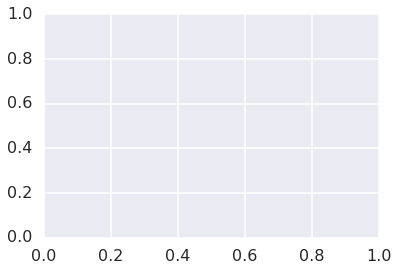

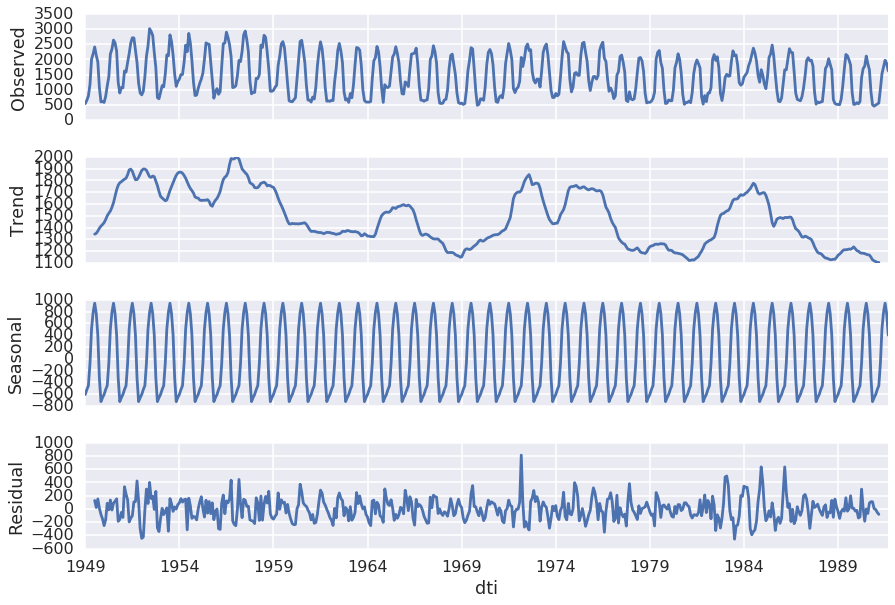

In [41]:
# % matpotlib inline
import seaborn as sns
sns.set_context('poster')
fig,ax = plt.subplots(1,1, figsize=(6,4))  
flow = df['mean_va']  
print(flow[:'1949-01'])
flow = flow['1949-01':]

res = sm.tsa.seasonal_decompose(flow)  
fig = res.plot()  
fig.show()